In [1]:
import numpy as np
import pandas as pd

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

csv = pd.read_csv('/home/lpo/absenteeism.csv', sep=';')
data = csv.to_numpy()

# Standaryzacja danych
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

/home/lpo/.sage/local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


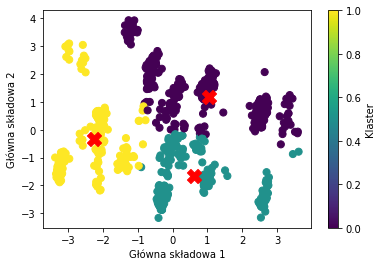

In [2]:
# Redukcja wymiarowosci za pomoca PCA
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

# Klasteryzacja k-means
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(data_pca)

# Wizualizacja wynikow
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=labels, cmap='viridis', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            c='red', marker='X', s=200, label='Centra klastrow')
plt.xlabel('Główna składowa 1')
plt.ylabel('Główna składowa 2')
plt.colorbar(label='Klaster')
plt.show()

In [3]:
no_pca_labels = KMeans(n_clusters=3, random_state=42).fit_predict(data_scaled)

data = [[no_pca_labels[i], labels[i]] for i in range(0,20)]
pd.DataFrame(data, columns=["Klaster przed redukcją wymiarowości", "Klaster po redukcji wymiarowości"])

,Klaster przed redukcją wymiarowości,Klaster po redukcji wymiarowości
0,2,0
1,0,1
2,2,0
3,1,0
4,2,0
5,2,0
6,1,0
7,1,0
8,2,1
9,1,1


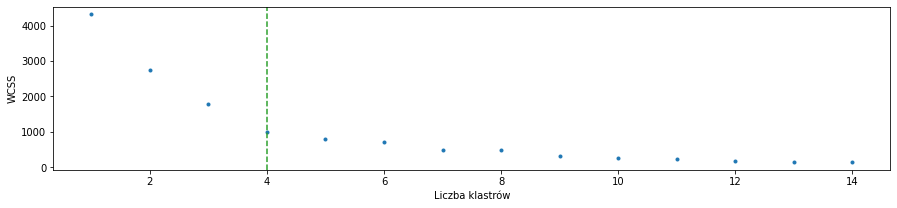

In [4]:
wcss = []

for i in range(1, 15):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit_predict(data_pca)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(15, 3))
plt.plot(range(1, 15), wcss, '.')
plt.axvline(4,linestyle='--',color='C2')
plt.xlabel('Liczba klastrów')
plt.ylabel('WCSS')
plt.show()

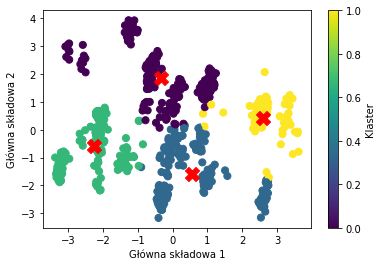

In [5]:
# Klasteryzacja k-means z optymalnym k
kmeans = KMeans(n_clusters=4, random_state=42)
labels = kmeans.fit_predict(data_pca)

# Wizualizacja wynikow
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=labels, cmap='viridis', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            c='red', marker='X', s=200, label='Centra klastrów')
plt.xlabel('Główna składowa 1')
plt.ylabel('Główna składowa 2')
plt.colorbar(label='Klaster')
plt.show()

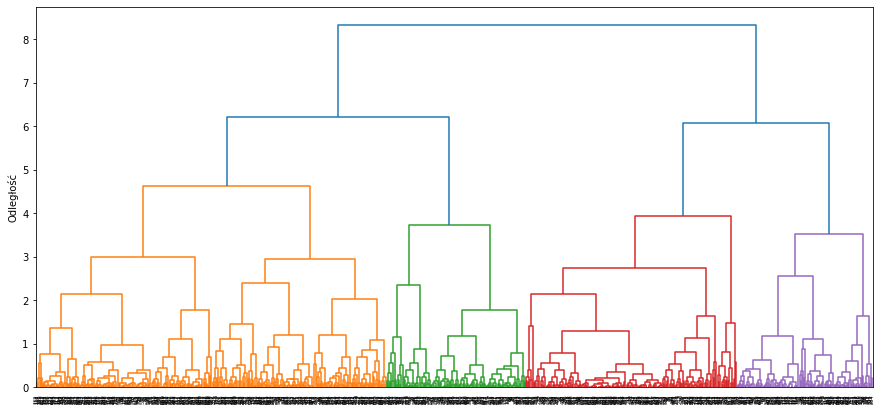

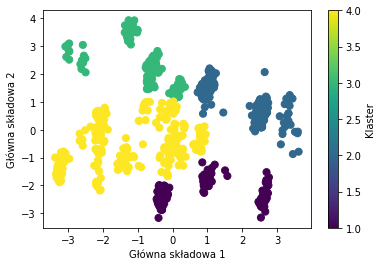

In [6]:
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

data = data_pca

# Klasteryzacja hierarchiczna metodą complete
linked = linkage(data, method='complete')

# Wizualizacja dendrogramu
plt.figure(figsize=(15, 7))
dendrogram(linked, orientation='top', distance_sort='descending')
plt.ylabel('Odległość')
plt.show()

# Wyodrebnienie klastrow na wybranym poziomie
clusters = fcluster(linked, t=4, criterion='maxclust')

# Wizualizacja skupien
plt.scatter(data[:, 0], data[:, 1], c=clusters, cmap='viridis', s=50)
plt.xlabel('Główna składowa 1')
plt.ylabel('Główna składowa 2')
plt.colorbar(label='Klaster')
plt.show()

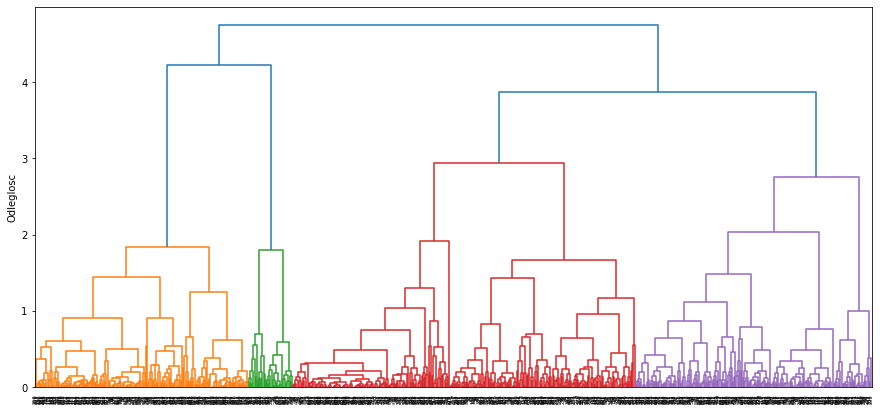

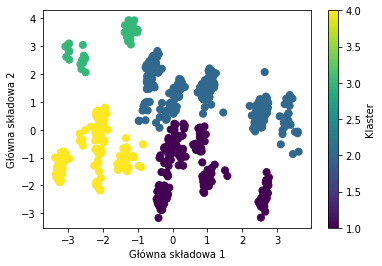

In [7]:
# Klasteryzacja hierarchiczna metodą weighted
linked = linkage(data, method='weighted')

# Wizualizacja dendrogramu
plt.figure(figsize=(15, 7))
dendrogram(linked, orientation='top', distance_sort='descending')
plt.ylabel('Odleglosc')
plt.show()

# Wyodrebnienie klastrow na wybranym poziomie
clusters = fcluster(linked, t=4, criterion='maxclust')

# Wizualizacja skupien
plt.scatter(data[:, 0], data[:, 1], c=clusters, cmap='viridis', s=50)
plt.xlabel('Główna składowa 1')
plt.ylabel('Główna składowa 2')
plt.colorbar(label='Klaster')
plt.show()

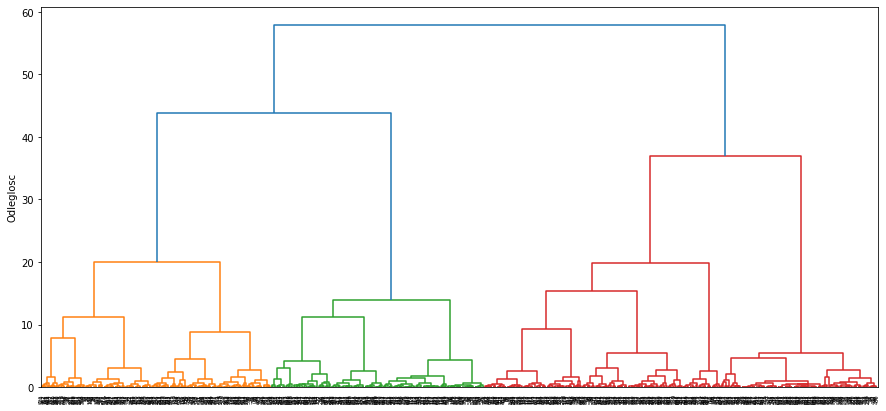

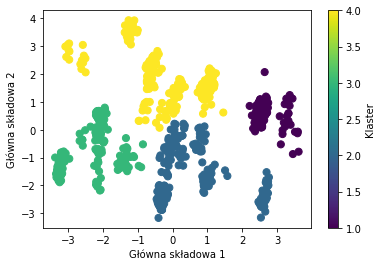

In [8]:
# Klasteryzacja hierarchiczna metodą ward
linked = linkage(data, method='ward')

# Wizualizacja dendrogramu
plt.figure(figsize=(15, 7))
dendrogram(linked, orientation='top', distance_sort='descending')
plt.ylabel('Odleglosc')
plt.show()

# Wyodrebnienie klastrow na 4 poziomie
clusters = fcluster(linked, t=4, criterion='maxclust')

# Wizualizacja skupien
plt.scatter(data[:, 0], data[:, 1], c=clusters, cmap='viridis', s=50)
plt.xlabel('Główna składowa 1')
plt.ylabel('Główna składowa 2')
plt.colorbar(label='Klaster')
plt.show()

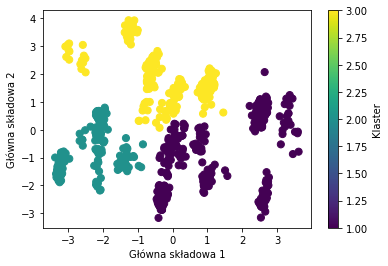

In [9]:
# Wyodrebnienie klastrow na 3 poziomie
clusters = fcluster(linked, t=3, criterion='maxclust')

# Wizualizacja skupien
plt.scatter(data[:, 0], data[:, 1], c=clusters, cmap='viridis', s=50)
plt.xlabel('Główna składowa 1')
plt.ylabel('Główna składowa 2')
plt.colorbar(label='Klaster')
plt.show()

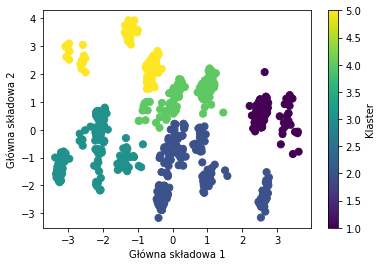

In [10]:
# Wyodrebnienie klastrow na 5 poziomie
clusters = fcluster(linked, t=5, criterion='maxclust')

# Wizualizacja skupien
plt.scatter(data[:, 0], data[:, 1], c=clusters, cmap='viridis', s=50)
plt.xlabel('Główna składowa 1')
plt.ylabel('Główna składowa 2')
plt.colorbar(label='Klaster')
plt.show()